<a href="https://colab.research.google.com/github/rinlynlin/deeplearning_practice/blob/main/__20221130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras를 이용하여 딥러닝 모델 만들고 훈련하기

파이썬 딥러닝 라이브러리인 Keras를 이용하여 실전 문제에서 신경망을 어떻게 사용하는지 세 가지 예제를 살펴 본다.
* AND, XOR (이진 분류)  
* MNIST 데이터 이미지 분류 (다중 분류)



## Google Colab
* 런타입 유형 변경 : GPU
* Cell 실행: Control + Enter
* Cell 실행 + 다음셀 이동: Shift + Enter
* 줄 번호 보기: Ctrl + M + L
* 단축키 모음 보기: Ctrl + M + H

## And gate: 이진 분류

In [ ]:
from keras.models import Sequential # keras.models의 Sequential을 설치
from keras.layers import Dense      #keras,layer의 Dense를 설치
from keras.optimizers import SGD    #Keras,optimizer의 SGD를 설치
import numpy as np                  #numpy 설치

x_data = np.array([[0., 0.],        #x 값 array형식
          [0., 1.],
          [1., 0.],
          [1., 1.]])
y_data = np.array([[0.],            #target
          [0.],
          [0.],
          [1.]])


model = Sequential()                
model.add(Dense(1, input_dim=2, activation='sigmoid')) #fully-connected layer

sgd = SGD(learning_rate=0.1)                           #learning_rate 주기(hyperparameter)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy']) #이진분류이므로 binary_crossentropy사용

model.summary()                                         
model.fit(x_data, y_data, epochs=300)                  # epoch를 300으로 학습시키기

score = model.evaluate(x_data, y_data, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 0.8702 - accuracy: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 0.8443 - accuracy: 0.5000
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 0.8198 - accuracy: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 0.7965 - accuracy: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 9ms/step - loss: 0.7745 - accuracy: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 0.7536 - accuracy: 0.5000
Epoch 7

## XOR gate : 이진 분류

* 단일 퍼셉트론으로 해결 불가능하다

In [ ]:
from keras.models import Sequential  # keras.models의 Sequential을 설치
from keras.layers import Dense       #keras,layer의 Dense를 설치
from keras.optimizers import SGD     #Keras,optimizer의 SGD를 설치

x_data = np.array([[0., 0.],         #x 값 array형식
          [0., 1.],
          [1., 0.],
          [1., 1.]])
y_data = np.array([[0.],             #target
          [1.],
          [1.],
          [0.]])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid')) #dense 층 1개 dimention은 2개
sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd,  
              metrics=['accuracy'])
model.summary()
model.fit(x_data, y_data, epochs=10000)  #10000번 돌리기 

score = model.evaluate(x_data, y_data, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])   #dense 층이 1개이므로 100퍼센트가 나오지 않는다.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 7502/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 7503/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 7504/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 7505/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 7506/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 7507/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 7508/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 7509/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 7510/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 7511/10000
1/1 [========================

## XOR gate: Multi-Layer Perceptron
 * NN을 이용한 해결 방법

In [ ]:
from keras.models import Sequential # keras.models의 Sequential을 설치
from keras.layers import Dense      #keras,layer의 Dense를 설치
from keras.optimizers import SGD    #Keras,optimizer의 SGD를 설치

x_data = np.array([[0., 0.],        #x 값 array형식
          [0., 1.],
          [1., 0.],
          [1., 1.]])
y_data = np.array([[0.],            #target
          [1.],
          [1.],
          [0.]])

model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid')) #Dense층을 2개로
model.add(Dense(1, activation='sigmoid'))              #sigmoid 함수사용
sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd,
              metrics=['accuracy'])

model.summary()
model.fit(x_data, y_data, epochs=10000)

print(model.predict(x_data))

score = model.evaluate(x_data, y_data, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])                     #XOR문제는 Dense층을 2개 이상 사용하여야한다.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 7ms/step - loss: 0.4903 - accuracy: 0.7500
Epoch 7505/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4903 - accuracy: 0.7500
Epoch 7506/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4903 - accuracy: 0.7500
Epoch 7507/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4903 - accuracy: 0.7500
Epoch 7508/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4903 - accuracy: 0.7500
Epoch 7509/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4903 - accuracy: 0.7500
Epoch 7510/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4903 - accuracy: 0.7500
Epoch 7511/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4903 - accuracy: 0.7500
Epoch 7512/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4903 - accuracy: 0.7500
Epoch 7513/10000
1/1 [==============================] - 0s 7ms/

#7.2 MNIST 데이터 이미지 분류




## MNIST 데이터셋


*   Keras에 포함되어 있는 데이터셋
*   훈련 데이터 6만개, 테스트 테이터 1만개
*  흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류하는 것

In [ ]:
from keras.datasets import mnist      #mnist 이미지 불러오기 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape  #이미지의 개수, 형식> 이경우 28*28 2차원벡터 

(60000, 28, 28)

In [ ]:
len(train_labels) #labels의 개수 

60000

In [ ]:
train_labels  #train_labels 불러오기 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape #test_images 형식 > train_images와 겹치지 않는다.

(10000, 28, 28)

In [ ]:
len(test_labels) #test_labels의 개수

10000

In [ ]:
test_labels   #test_labels 불러오기 

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
import matplotlib.pyplot as plt #matplotlob.pyplot 불러오기 

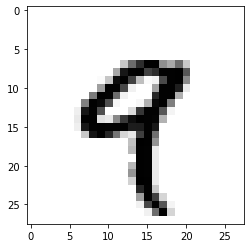

In [ ]:
digit = train_images[4]  #train_images의 4번째 항목

plt.imshow(digit, cmap=plt.cm.binary)  #그래프로 보이기 
plt.show()

## 데이터 준비

훈련 이미지는 [0, 255] 사이의 값인 uint8 타입의 (60000, 28, 28) 크기를 가진 배열이다. 이 데이터를 0과 1 사이의 값을 가지는 float32 타입의 (60000, 784) 크기의 배열로 바꾼다. 28*28=784

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)) #train_images 재배열
train_images = train_images.astype('float32') / 255   #255로 나누기

test_images = test_images.reshape((10000, 28 * 28))   #재배열
test_images = test_images.astype('float32') / 255     #255로 나누기

레이블을 범주형으로 인코딩한다.

In [ ]:
from keras.utils import to_categorical              #keras.utils의 to_categorical 함수를 import

train_labels = to_categorical(train_labels)         #one-hot 인코딩
test_labels = to_categorical(test_labels)           #one-hot 인코딩

## 모델 구성

두개의 Dense 층을 쌓는다. 중간 은닉층의 활성화함수는 relu를 사용하는 것이 성능 향상에 좋다. 다중 분류문제이므로 마지막 은닉층의 활성화함수는 소프트맥스를 사용해야한다.

In [ ]:
from keras import models                   #keras의 models import
from keras import layers                   #keras의 layer import 

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) #dense층을 512개 relu함수 사용
network.add(layers.Dense(10, activation='softmax'))                       #dense층을 10개 softmax함수 사용

옵티마이저, 비용함수, 평가지표를 정해준다.

In [ ]:
network.compile(optimizer='rmsprop',  #optimizer함수로 rmsprop함수 사용 -> 모든축을 공평하게 업데이트
                loss='categorical_crossentropy', #loss함수로 경사하강법 사용
                metrics=['accuracy'])

케라스에서는 fit 메서드를 호출하여 훈련 데이터에 모델을 학습시킨다.

In [ ]:
# 모델 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)  #batch_size를 128로 준다

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2570 - accuracy: 0.9270
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1039 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0674 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9857
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0371 - accuracy: 0.9887


## 모델 테스트

새로운 테스트셋에서도 모델이 잘 작동하는지 확인한다.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels) #test셋에서 돌려본다.

313/313 [==============================] - 2s 4ms/step - loss: 0.0703 - accuracy: 0.9795


In [ ]:
print('test_acc:', test_acc) #결과 출력

test_acc: 0.9794999957084656



1.   test_number : test 데이터 셋에서 몇번째 데이터를 가지고 올 지 정하는 숫자
2.   test_images : 원래 28*28로 이루어진 original 데이터
3.   test_images는 벡터이고 정규화 한 데이터 상태이므로 다시 이미지로 원상 복귀시킨것이 digit_data




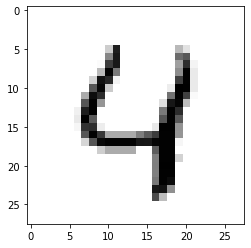

313/313 [==============================] - 0s 1ms/step
test image predicted label :  4
real label :  4


In [ ]:
import numpy as np #numpy import

test_number = 4
digit = test_images[test_number] # 벡터 + 정규화 한 데이터
label = test_labels[test_number]

# 28*28 이미지로 원상복귀 시킨다
digit_data = test_images[test_number].reshape((28, 28)).astype('float32')*255

#test_data의 test_number 번째 데이터 그림으로 보여주기
plt.imshow(digit_data, cmap=plt.cm.binary)
plt.show()

#predictions : test 데이터 전체를 이용해서 예측한 결과
predictions = np.argmax(network.predict(test_images), axis=-1)
print('test image predicted label : ', predictions[test_number])
print('real label : ', np.argmax(label, axis=-1))

## 합성곱 신경망(CNN, Convolutional Neural Network)
* MNIST 데이터 분류하기

MNIST 숫자 이미지 분류에 컨브넷을 사용해 보겠습니다. 기본적인 컨브넷이더라도 7.2절의 완전 연결된 모델의 성능을 훨씬 앞지를 것입니다.

다음 코드는 기본적인 컨브넷의 모습입니다. Conv2D와 MaxPooling2D 층을 쌓아 올렸습니다. 잠시 후에 이들이 무엇인지 배우겠습니다.

컨브넷이 (image_height, image_width, image_channels) 크기의 입력 텐서를 사용한다는 점이 중요합니다(배치 차원은 포함하지 않습니다). 이 예제에서는 MNIST 이미지 포맷인 (28, 28, 1) 크기의 입력을 처리하도록 컨브넷을 설정해야 합니다. 이 때문에 첫 번째 층의 매개변수로 input_shape=(28, 28, 1)을 전달합니다.

In [ ]:
from keras.datasets import mnist  #mnist 데이터 가져오기

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape)  #이미지 형식확인
print(train_labels.shape)  #labels 형식 확인

(60000, 28, 28)
(60000,)


In [ ]:
print(test_images.shape)  #test이미지 형식
print(test_labels.shape)  #test label 형식

(10000, 28, 28)
(10000,)


### 데이터 전처리
* 3차원 텐서 형태로 바꾼다
* MinMax Normalization
* label을 one-hot encoding 시킨다

In [ ]:
from keras.utils import to_categorical                #to_categorical import

train_images = train_images.reshape((60000, 28, 28, 1)) #재배열
train_images = train_images.astype('float32') / 255     #255로 나누기

test_images = test_images.reshape((10000, 28, 28, 1))   #재배열
test_images = test_images.astype('float32') / 255       #255로 나누기 

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 모델 구성

Conv2D와 MaxPooling2D 층의 출력은 (height, width, channels) 크기의 3D 텐서입니다. 높이와 넓이 차원은 네트워크가 깊어질수록 작아지는 경향이 있습니다. 채널의 수는 Conv2D 층에 전달된 첫 번째 매개변수에 의해 조절됩니다(32개 또는 64개).

다음 단계에서 마지막 층의 ((3, 3, 64) 크기인) 출력 텐서를 완전 연결 네트워크에 주입합니다. 이 네트워크는 이미 익숙하게 보았던 Dense 층을 쌓은 분류기입니다. 이 분류기는 1D 벡터를 처리하는데 이전 층의 출력이 3D 텐서입니다. 그래서 먼저 3D 출력을 1D 텐서로 펼쳐야 합니다. 그다음 몇 개의 Dense 층을 추가합니다

In [ ]:
from keras import layers        #layer improt 
from keras import models        #models import

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #3*3짜리 conv층 32개 사용 relu 함수사용
model.add(layers.MaxPooling2D((2, 2)))                                           #2*2maxpooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))                          #3*3짜리 conv층 64개 사용 
model.add(layers.MaxPooling2D((2, 2)))                                           #2*2 maxpooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))                          #3*3짜리 conv층 62개 사용
model.add(layers.Flatten())                                                      #flatten 시키기
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

### 모델 컴파일
### 모델 학습

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 12s 5ms/step - loss: 0.1677 - accuracy: 0.9475
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0486 - accuracy: 0.9849
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0325 - accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0247 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0195 - accuracy: 0.9939


### 테스트 데이터로 모델 평가하기

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9901


In [ ]:
test_acc

0.9901000261306763

**99.5%이상 나오게 모델구성**


In [ ]:
from keras import layers        #layer improt 
from keras import models        #models import

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #3*3짜리 conv층 32개 사용 relu 함수사용
model.add(layers.MaxPooling2D((2, 2)))                                           #2*2maxpooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))                          #3*3짜리 conv층 64개 사용 
model.add(layers.MaxPooling2D((2, 2)))                                           #2*2 maxpooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))                         #3*3짜리 conv층 62개 사용
model.add(layers.BatchNormalization())
model.add(layers.Flatten())                                                      #flatten 시키기
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 batch_normalization_7 (Batc  (None, 3, 3, 64)       

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=100, batch_size=64)

Epoch 1/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 2/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 3/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0033 - accuracy: 0.9995
Epoch 4/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 5/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 6/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0020 - accuracy: 0.9997
Epoch 7/100
938/938 [==============================] - 5s 5ms/step - loss: 6.3790e-04 - accuracy: 0.9999
Epoch 8/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 9/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 10/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0028 - ac

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1273 - accuracy: 0.9941


In [ ]:
test_acc

0.9940999746322632